In [9]:
import pegasus as pg
import pandas as pd
import numpy as np

from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import pegasus as pg
import pegasusio as io
from adjustText import adjust_text

import warnings
warnings.filterwarnings("ignore")

def small_pos(lst):
    lst = np.array(lst)
    return np.min(lst[np.nonzero(lst)])

def volcanoPlot(data, numer, denom, title, save, genes=None, avoidPoints=None):
    colors = []
    for index, row in data.iterrows():
        if row['padj']  <= 0.05 and np.abs(row['log2FoldChange'])>1:
            colors.append("red")
        elif row['padj'] <= 0.05 and np.abs(row['log2FoldChange'])<1:
            colors.append("blue")
        elif row['padj'] > 0.05 and np.abs(row['log2FoldChange'])>1:
            colors.append("green")
        else:
            colors.append("black")
    data['colors'] = colors
    data['padj'] = data['padj'].replace(to_replace=0, value=small_pos(data['padj']))
    data['-log10Padj'] = -1*np.log10(data['padj'])        
    ax1 = data.plot.scatter(x='log2FoldChange',y='-log10Padj', c='colors', s=5, figsize=(8, 8))
    plt.axhline(y = -1*np.log10(0.05), color = 'black', linestyle = 'dashed')
    plt.axvline(x = 1, color = 'black', linestyle = 'dashed')
    plt.axvline(x = -1, color = 'black', linestyle = 'dashed');
    plt.title(title);

    # Compute Distances and sort by to get top 20 genes
    data['distance'] = np.sqrt(np.square(np.abs(data['log2FoldChange'])-1) + np.square(data['-log10Padj'] - (-1*np.log10(0.05))))
    mylabels = data[data["colors"]=='red'].sort_values(by="distance", ascending=False).head(20).index.tolist()
    if genes is not None:
        mylabels = genes
    if genes != 'No Genes':
        if genes is not None:
            texts = [plt.text(data.loc[r,'log2FoldChange'],data.loc[r, '-log10Padj'],r,ha='right',va='bottom',fontsize='large') for r in mylabels];
        if avoidPoints is not None:
            for i in avoidPoints:
                texts = texts + [plt.text(i[0], i[1],'')]
        if genes is not None:
            adjust_text(texts, add_objects = [ax1], arrowprops=dict(arrowstyle='->', color='black'));
        else:
            adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'));
        
    plt.figtext(0.12,0.05,denom);
    plt.figtext(0.75,0.05,numer);
    if save != 'No Save':
        plt.savefig("./Figures/{}.pdf".format(save), dpi=650)
    return ax1

def intersect(l1, l2):
    return [i for i in l1 if i in l2]

# PBS Tretaed CD4+ T cells - Young vs Old

In [2]:
cd4data = pg.read_input("./adatas/graph1_cd4.h5ad")

pseudo_cd4 = pg.pseudobulk(cd4data, 'sample', 'age')

pg.deseq2(pseudo_cd4, '~age', ('age', '90wk', '8wk')) # 90wk numerator, 8wk denominator
df = pd.DataFrame(pseudo_cd4.varm["deseq2"], index=pseudo_cd4.var_names)
df.to_csv('./DE_gene_analysis/cd4_pbs_8v90.csv')

2024-02-21 14:09:11,280 - pegasusio.readwrite - INFO - h5ad file './adatas/graph1_cd4.h5ad' is loaded.
2024-02-21 14:09:11,281 - pegasusio.readwrite - INFO - Function 'read_input' finished in 2.13s.
2024-02-21 14:09:14,670 - pegasusio.readwrite - INFO - h5ad file './adatas/graph1_cd8.h5ad' is loaded.
2024-02-21 14:09:14,670 - pegasusio.readwrite - INFO - Function 'read_input' finished in 3.39s.
2024-02-21 14:09:14,728 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.06s.
2024-02-21 14:09:14,792 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.06s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2024-02-21 14:09:26,628 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 11.83s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2024-02-21 14:09:33,884 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 7.26s.


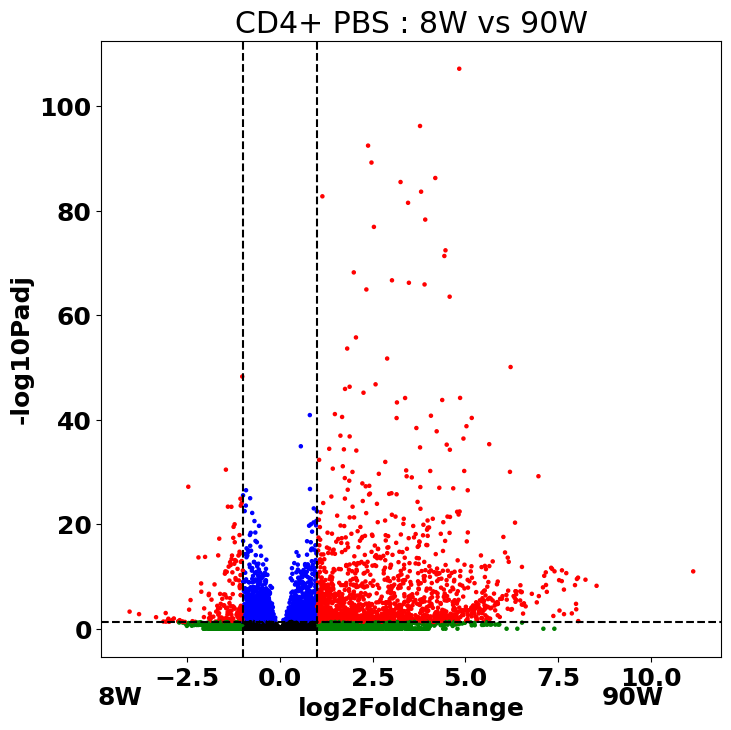

In [11]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

data = pd.read_csv("./DE_gene_analysis/cd4_pbs_8v90.csv")
# data=data.rename(columns = {'Unnamed: 0':'gene'})
data.set_index('featurekey', drop=False, inplace = True)

ax = volcanoPlot(data, numer="90W", denom="8W", title="CD4+ PBS : 8W vs 90W", save="graph1_cd4_blank", genes="No Genes");

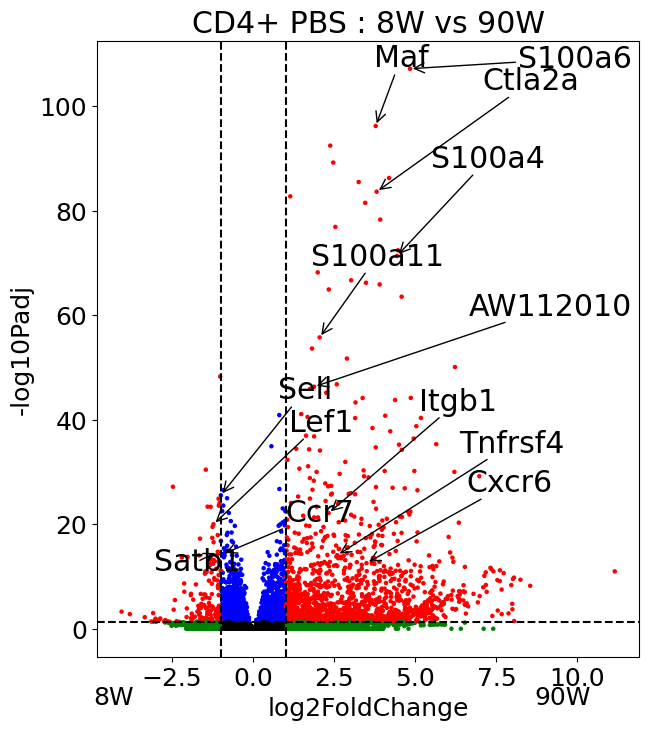

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

data = pd.read_csv("./DE_gene_analysis/cd4_pbs_8v90.csv")
# data=data.rename(columns = {'Unnamed: 0':'gene'})
data.set_index('featurekey', drop=False, inplace = True)
genes = ['Lef1', 'Satb1', 'Ccr7', 'Sell', 'S100a4', 'S100a6', 'S100a11', 'Cxcr6', 'Itgb1','AW112010',
         'Maf', 'Ctla2a','Tnfrsf4']
ax = volcanoPlot(data, numer="90W", denom="8W", title="CD4+ PBS : 8W vs 90W", save="graph1_cd4", genes=genes);

# OVA+LPS+PGPC Treated CD4+ T cells - Young vs Old

In [5]:
cd4data = pg.read_input("./adatas/graph2_cd4.h5ad")

pseudo_cd4 = pg.pseudobulk(cd4data, 'sample', 'age')

pg.deseq2(pseudo_cd4, '~age', ('age', '90wk', '8wk')) # 90wk numerator, 8wk denominator
df = pd.DataFrame(pseudo_cd4.varm["deseq2"], index=pseudo_cd4.var_names)
df.to_csv('./DE_gene_analysis/cd4_ova+lps+pgpc_8v90.csv')

2023-12-17 19:10:18,925 - pegasusio.readwrite - INFO - h5ad file './adatas/graph2_cd4.h5ad' is loaded.
2023-12-17 19:10:18,926 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.50s.
2023-12-17 19:10:19,554 - pegasusio.readwrite - INFO - h5ad file './adatas/graph2_cd8.h5ad' is loaded.
2023-12-17 19:10:19,555 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.61s.
2023-12-17 19:10:19,645 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.07s.
2023-12-17 19:10:19,722 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.08s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2023-12-17 19:10:28,219 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 8.50s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



2023-12-17 19:10:36,166 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 7.80s.


In [12]:
data = pd.read_csv("./DE_gene_analysis/cd4_ova+lps+pgpc_8v90.csv")
data

,featurekey,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Xkr4,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
1,Gm37381,0.146507,0.416810,3.160747,0.131871,8.950866e-01,1.000000e+00
2,Rp1,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
3,Sox17,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
4,Mrpl15,194.223616,-0.137775,0.111279,-1.238105,2.156771e-01,4.234873e-01
...,...,...,...,...,...,...,...
22274,Tmlhe,75.495309,0.028158,0.173133,0.162637,8.708045e-01,9.401276e-01
22275,CR974586.4,0.105958,1.570951,3.160747,0.497019,6.191757e-01,1.000000e+00
22276,4933409K07Rik,0.119509,1.570951,3.160747,0.497019,6.191757e-01,1.000000e+00
22277,CAAA01147332.1,369.403724,0.822134,0.119924,6.855479,7.107418e-12,2.101531e-10


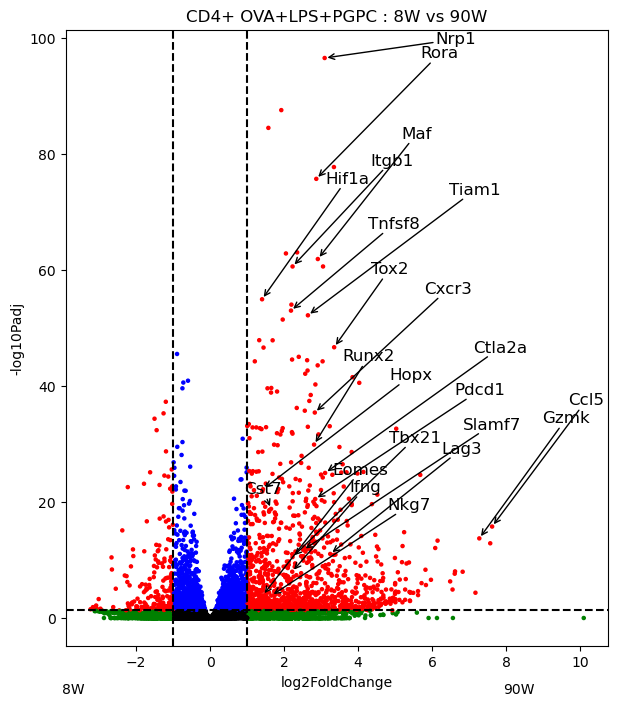

In [20]:
data = pd.read_csv("./DE_gene_analysis/cd4_ova+lps+pgpc_8v90.csv")
data.set_index('featurekey', drop=False, inplace = True)

# th1 = ['Cxcr3','Ccl5','Tbx21','Ifng','Il12rb2','Hlx','Hopx','Eomes','Runx2', 'Cx3cr1', 'Itgb1', 'Runx3']
# cyto = ['Cst7', 'Ctla2a', 'Cx3cr1', 'Eomes', 'Fcrl6', 'Gzma', 'Gzmb','Gzmk', 'Ifng', 'Lamp1', 'Nkg7', 'Prf1', 'Runx3', 'Slamf7']
goi = ['Cxcr3','Ccl5','Tbx21','Ifng','Il12rb2','Hlx','Hopx','Eomes','Runx2', 'Cx3cr1', 'Itgb1', 'Runx3',
       'Cst7', 'Ctla2a', 'Cx3cr1', 'Eomes', 'Fcrl6', 'Gzma', 'Gzmb','Gzmk', 'Ifng', 'Lamp1', 'Nkg7', 'Prf1', 'Runx3', 'Slamf7']
goi = np.unique(goi)
goi = [i for i in goi if (data.loc[i, 'log2FoldChange'] > 1)&(data.loc[i, 'padj'] < 0.000001)]
genes = ['Rora', 'Itgb1', 'Hif1a', 'Tox2',
        'Maf', 'Tnfsf8',
        'Tiam1', 'Nrp1',
        'Eomes', 'Gzmk', 'Ctla2a',
        'Lag3', 'Pdcd1']
ax = volcanoPlot(data, numer="90W", denom="8W", title="CD4+ OVA+LPS+PGPC : 8W vs 90W", save="graph2_cd4",genes=np.unique(genes+goi),avoidPoints=None) # [[2.9,10]]

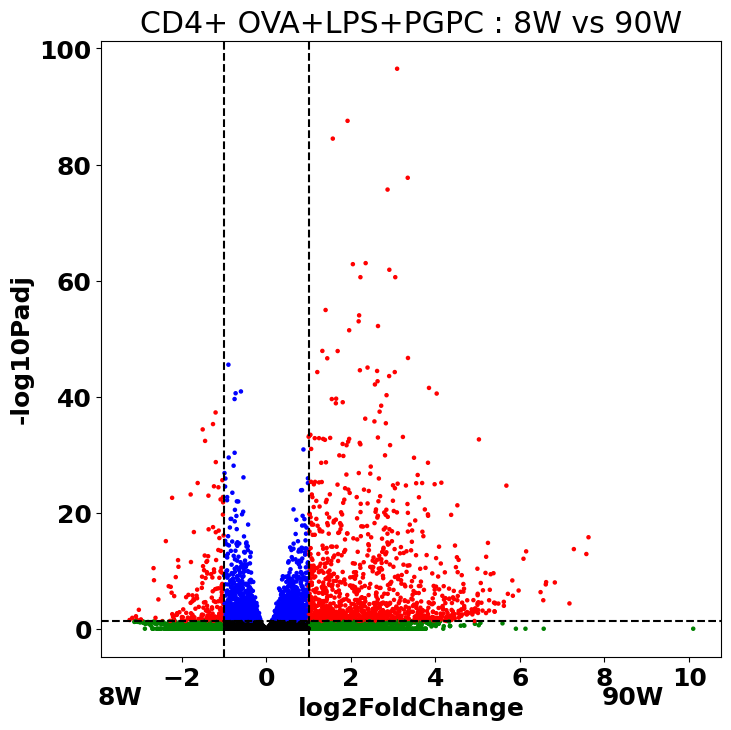

In [12]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

data = pd.read_csv("./DE_gene_analysis/cd4_ova+lps+pgpc_8v90.csv")
# data=data.rename(columns = {'Unnamed: 0':'gene'})
data.set_index('featurekey', drop=False, inplace = True)

ax = volcanoPlot(data, numer="90W", denom="8W", title="CD4+ OVA+LPS+PGPC : 8W vs 90W", save="graph2_cd4_blank", genes="No Genes");

In [8]:
# pgdata = pg.read_input("./adatas/graph3_cd4_90wk.h5ad")
# pseudo = pg.pseudobulk(pgdata, 'sample', 'treatment')

# for i in pseudo.obs['treatment'].unique():
#     pseudo.obs['treatment_{}'.format(i)] = pseudo.obs['treatment']==i
#     pseudo.obs['treatment_{}'.format(i)] = pseudo.obs['treatment_{}'.format(i)].astype(int)
#     pseudo.obs['treatment_{}'.format(i)] = pseudo.obs['treatment_{}'.format(i)].astype(str)

# for i in pseudo.obs['treatment'].unique():
#     pg.deseq2(pseudo, '~treatment_{}'.format(i), ('treatment_{}'.format(i), '1', '0')) # leiden group i numerator and rest of cells denominator
#     df = pd.DataFrame(pseudo.varm["deseq2"], index=pseudo.var_names)
#     # df = df[df['log2FoldChange'] > 0.585] # minimum increase of 1.5x expression.
#     df.to_csv('./dania_de_gene_analysis/graph3_{}_degs.csv'.format(i))

2023-12-17 19:10:52,520 - pegasusio.readwrite - INFO - h5ad file './adatas/graph3_cd4_90wk.h5ad' is loaded.
2023-12-17 19:10:52,521 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.49s.
2023-12-17 19:10:52,593 - pegasus.tools.pseudobulk - INFO - Function 'pseudobulk' finished in 0.07s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 24 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



2023-12-17 19:11:04,268 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 11.67s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 17 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



2023-12-17 19:11:14,464 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 10.05s.


R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 23 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



2023-12-17 19:11:24,922 - pegasus.tools.pseudobulk - INFO - Function 'deseq2' finished in 10.31s.


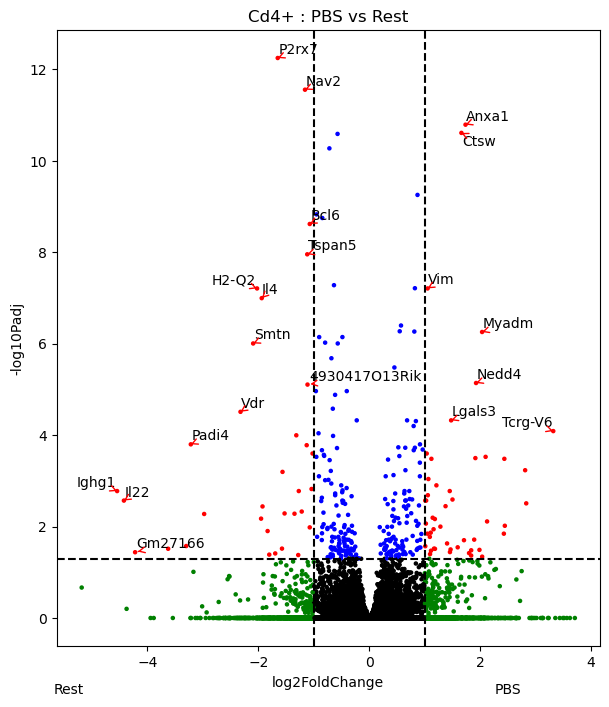

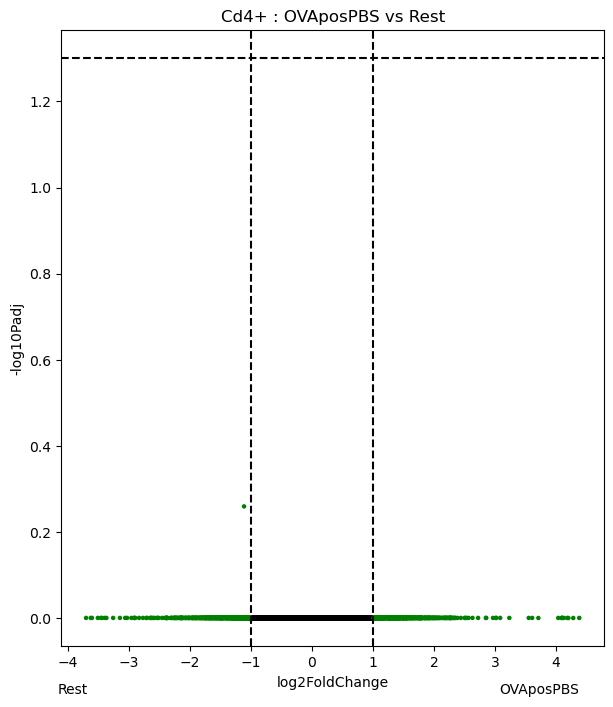

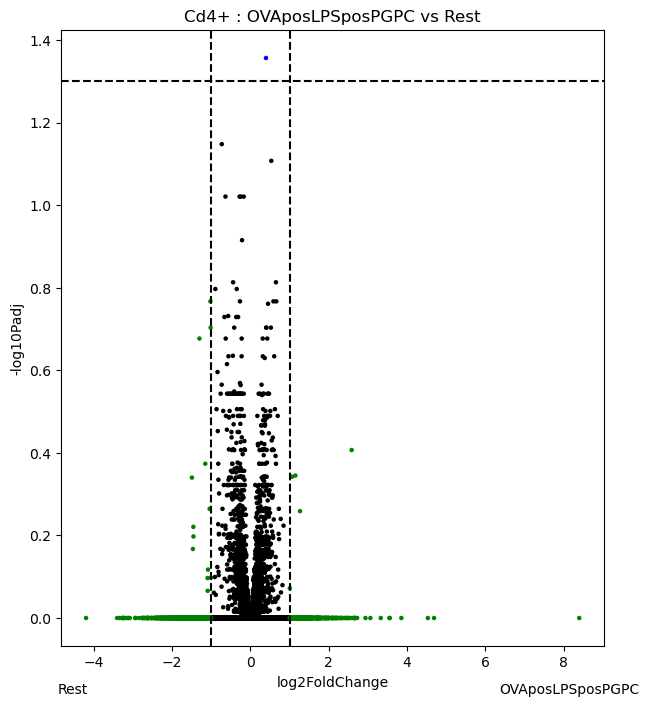

In [9]:
# for i in pseudo.obs['treatment'].unique():
#     data = pd.read_csv('./dania_de_gene_analysis/graph3_{}_degs.csv'.format(i))
#     data.set_index('featurekey', drop=False, inplace = True)
#     ax = volcanoPlot(data, numer=i, denom="Rest", title="Cd4+ : {} vs Rest".format(i), save="graph3_{}".format(i))

In [10]:
pseudo.obs

,treatment,treatment_PBS,treatment_OVAposPBS,treatment_OVAposLPSposPGPC
barcodekey,,,,
SMLZEF5_90wk_PBS_Only_Mouse_1,PBS,1,0,0
SMLZEF6_90wk_PBS_Only_Mouse_2,PBS,1,0,0
SMLZEF7_90wk_PBS_Only_Mouse_3,PBS,1,0,0
SMLZEF8_90wk_PBS_Only_Mouse_4,PBS,1,0,0
SMLZEF9_90wk_PBS_Only_Mouse_5,PBS,1,0,0
SMLZEFA_90wk_OVAposPBS_IFA_Mouse_1,OVAposPBS,0,1,0
SMLZEFB_90wk_OVAposPBS_IFA_Mouse_2,OVAposPBS,0,1,0
SMLZEFC_90wk_OVAposPBS_IFA_Mouse_3,OVAposPBS,0,1,0
SMLZEFD_90wk_OVAposPBS_IFA_Mouse_4,OVAposPBS,0,1,0


In [11]:
pgdata

MultimodalData object with 2 UnimodalData: 'unknown-rna', 'sample-pseudobulk'
    It currently binds to UnimodalData object unknown-rna

UnimodalData object with n_obs x n_vars = 5926 x 22279
    UID: unknown-rna; Genome: unknown; Modality: rna
    It contains 4 matrices: 'X', 'counts', 'lognormcounts', 'normcounts'
    It currently binds to matrix 'X' as X

    obs: 'sample', 'age', 'treatment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pl', 'mv', 'Tcell_score', 'Treg_score', 'Th1_score', 'Inhibitory_score', 'Cytokines_score', 'Cytotoxicity_score', 'Memory_score', 'TFs_score', 'leiden', 'leid_samp', 'pl_new', 'mv_new', 'leiden_based_cts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'X_umap_old'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
    uns: 'dendrogram_leiden', 'leiden', 'leiden_based_cts_co